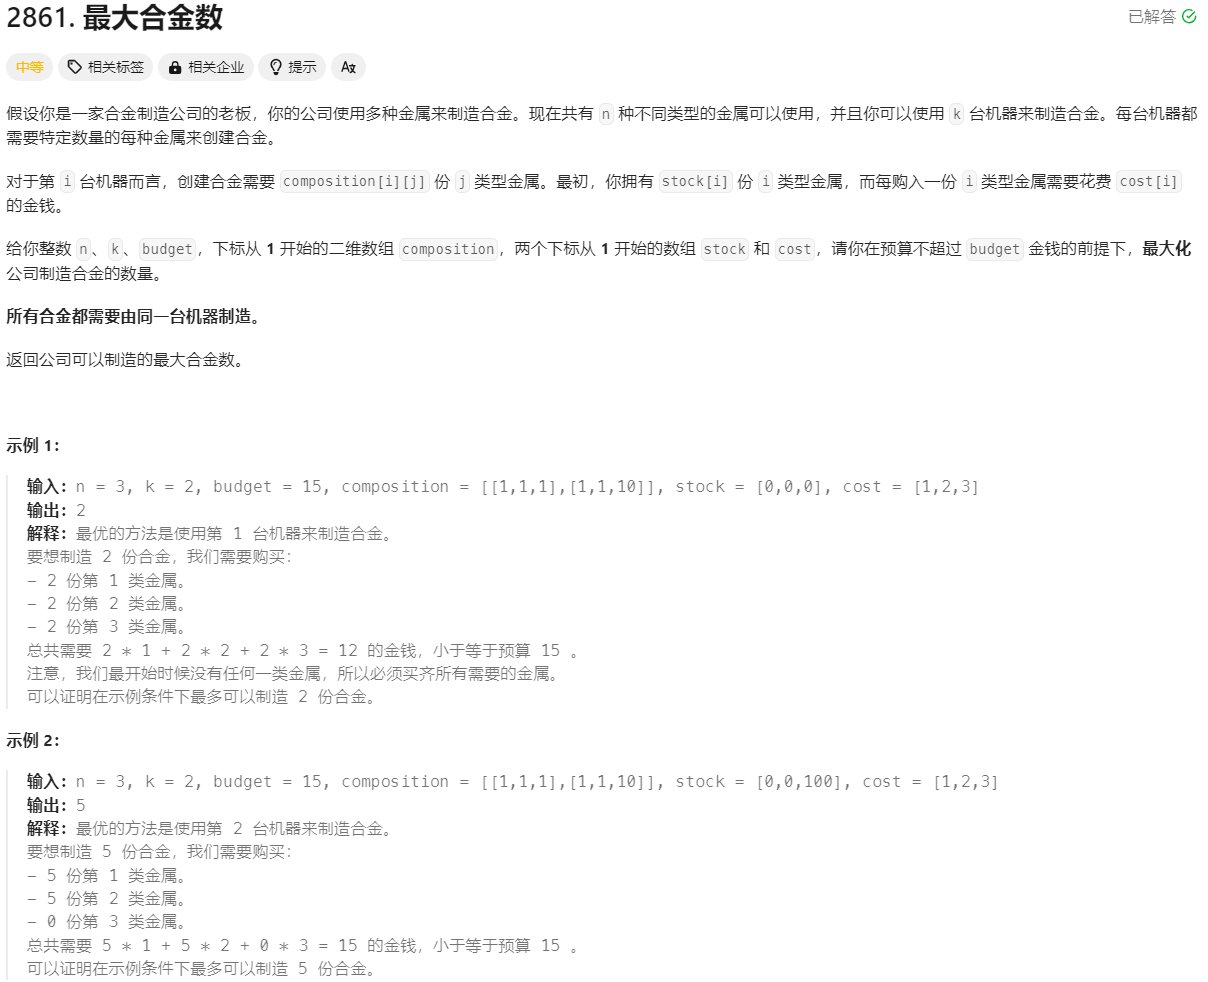

思路：二分  
二分的对象为合金的数量  
对于每个合金的数量 依次遍历所有的机器所需要的花费 如果存在机器能造mid个合金 则提高下限 否则降低上限  
对于初始的上限可以设置为 max(stock)+budget 这里是假设材料的最低价格为1 如果材料最低价格比1小 可能需要适当增大初始的上限  

In [1]:
from typing import List
class Solution:
    def maxNumberOfAlloys(self, n: int, k: int, budget: int, composition: List[List[int]], stock: List[int], cost: List[int]) -> int:
        left, right, ans = 1, max(stock)+budget, 0
        while left <= right:
            mid = (left + right) // 2
            valid = False
            # 遍历所有的机器
            for i in range(k):
                spend = 0
                # 将材料的每一行 库存 价格zip成一个len(stock)*3的矩阵
                # 然后遍历矩阵的每一列 即所需的材料j数量 材料j的库存  一个材料j的价格 
                for j, (composition_j, stock_j, cost_j) in enumerate(zip(composition[i], stock, cost)):
                    # 对所有材料做累加
                    spend += max(composition_j * mid - stock_j, 0) * cost_j
                # 是否低于预算
                if spend <= budget:
                    valid = True
                    break
            # 第i个机器 制造mid个零件所需的花费是否低于预算
            if valid:
                # 低于预算 下限提高
                ans = mid
                left = mid + 1
            else:
                # 高于预算 上限降低
                right = mid - 1
        return ans

In [2]:
Solution().maxNumberOfAlloys(n = 3, k = 2, budget = 15, composition = [[1,1,1],[1,1,10]], stock = [0,0,0], cost = [1,2,3])

2